In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

pd.set_option('display.max_rows', None)


In [2]:
data=pd.read_csv("../Phase_3_data/Rainfall.csv")

In [3]:
print('Data Shape:',data.shape)

Data Shape: (8425, 23)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


C:\Users\kulsr\AppData\Local\Temp\ipykernel_8896\2240823079.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='Rainfall',fill=True,  palette='Set2')


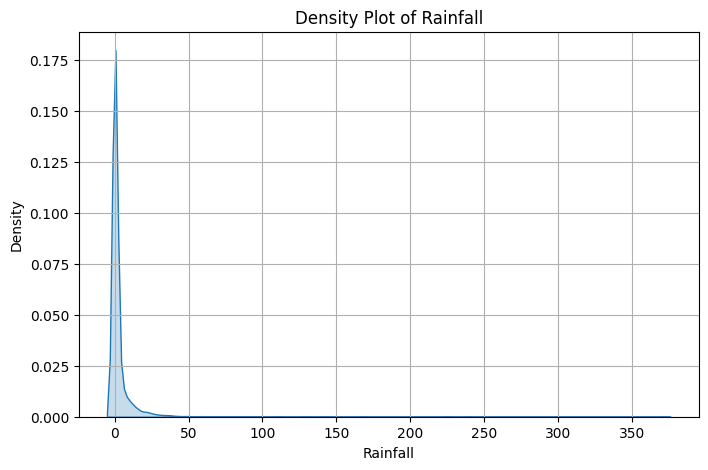

In [7]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='Rainfall',fill=True,  palette='Set2')
plt.title('Density Plot of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
data['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [10]:
data['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [12]:
data_reg=data.copy()
data_cla=data.copy()

In [13]:
label_encoder_Location= preprocessing.LabelEncoder() 
label_encoder_RainToday= preprocessing.LabelEncoder() 
label_encoder_RainTomorrow= preprocessing.LabelEncoder() 
label_encoder_WindGustDir = preprocessing.LabelEncoder() 
label_encoder_WindDir9am= preprocessing.LabelEncoder() 
label_encoder_WindDir3pm = preprocessing.LabelEncoder() 

data_reg['Location']= label_encoder_Location.fit_transform(data_reg['Location']) 
data_reg['RainToday']= label_encoder_RainToday.fit_transform(data_reg['RainToday']) 
data_reg['RainTomorrow']= label_encoder_RainTomorrow.fit_transform(data_reg['RainTomorrow']) 
data_reg['WindGustDir']= label_encoder_WindGustDir.fit_transform(data_reg['WindGustDir']) 
data_reg['WindDir9am']= label_encoder_WindDir9am.fit_transform(data_reg['WindDir9am']) 
data_reg['WindDir3pm']= label_encoder_WindDir3pm.fit_transform(data_reg['WindDir3pm']) 

## Regression Model

In [14]:
print('Data before Outlier Detection ',data_reg.shape)
Q1 = data_reg['Rainfall'].quantile(0.25)
Q3 = data_reg['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_reg = data_reg[(data_reg['Rainfall'] >= lower_bound) & (data_reg['Rainfall'] <= upper_bound)]
print('Data After Outlier Detection ',data_reg.shape)


Data before Outlier Detection  (8425, 23)
Data After Outlier Detection  (6646, 23)


In [15]:
data_reg.isna().sum()

Date                0
Location            0
MinTemp            40
MaxTemp            40
Rainfall            0
Evaporation      2735
Sunshine         3152
WindGustDir         0
WindGustSpeed     780
WindDir9am          0
WindDir3pm          0
WindSpeed9am       35
WindSpeed3pm       72
Humidity9am        32
Humidity3pm        69
Pressure9am      1046
Pressure3pm      1048
Cloud9am         1975
Cloud3pm         1998
Temp9am            29
Temp3pm            65
RainToday           0
RainTomorrow        0
dtype: int64

In [16]:
data_reg=data_reg.fillna(data_reg.mean())

C:\Users\kulsr\AppData\Local\Temp\ipykernel_8896\1990106045.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_reg=data_reg.fillna(data_reg.mean())


In [17]:
data_reg.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Feature Selection

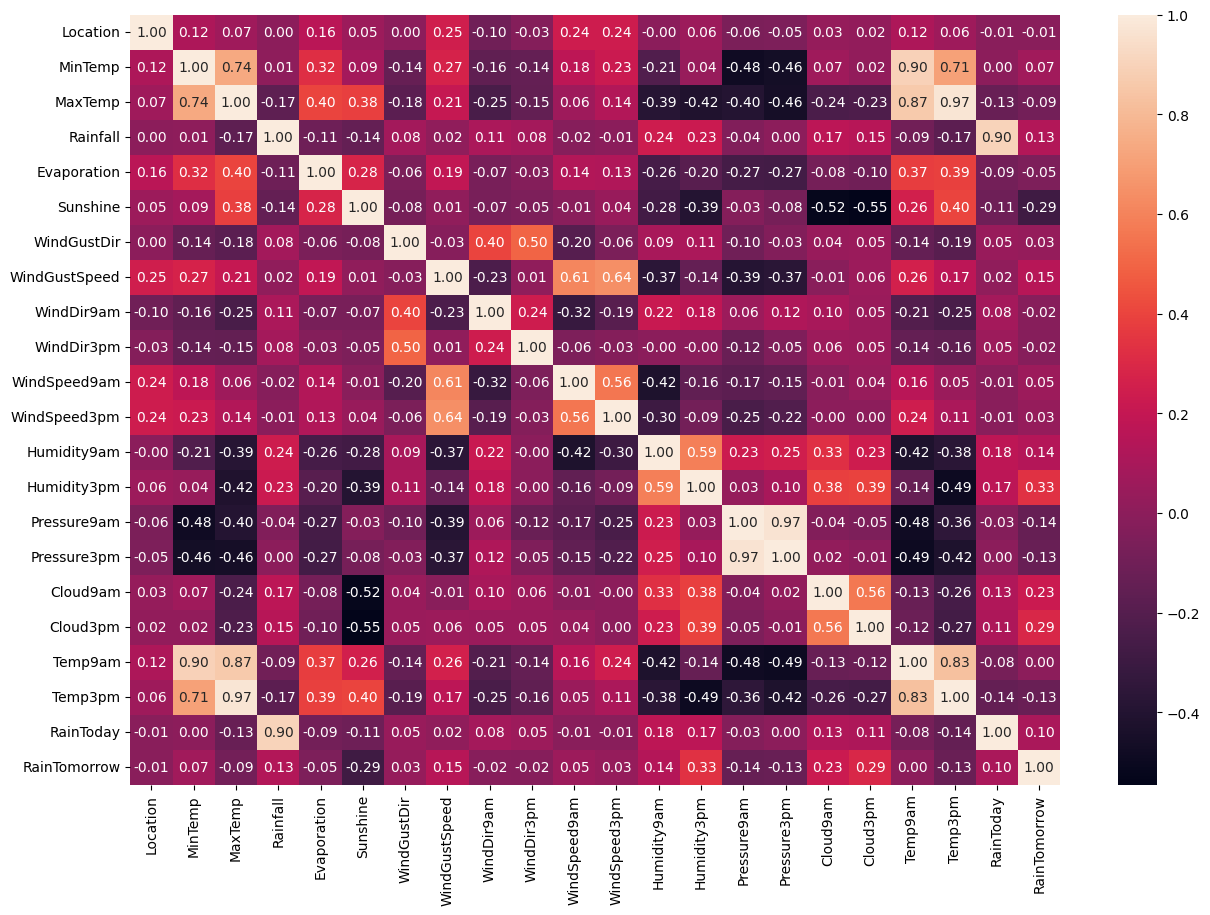

In [18]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data=data_reg.corr(), annot=True, fmt='.2f')

In [19]:
data_reg.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
data_reg=data_reg.drop(columns=['Pressure3pm', 'Pressure9am','MinTemp','WindGustSpeed','Date' ],axis=1).copy()

In [21]:
data_reg.duplicated().sum()

1241

In [22]:
data_reg = data_reg.drop_duplicates()

In [23]:
X = data_reg.drop('Rainfall', axis = 1)
y = data_reg['Rainfall']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [24]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_fn(best_model, X_test_scaled, Y_test, model_name, save_plot=False):
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate regression metrics
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')
    
    # Call plotting functions
    plot_results(Y_test, y_pred, model_name)

C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.21
R-squared (R²): 0.80


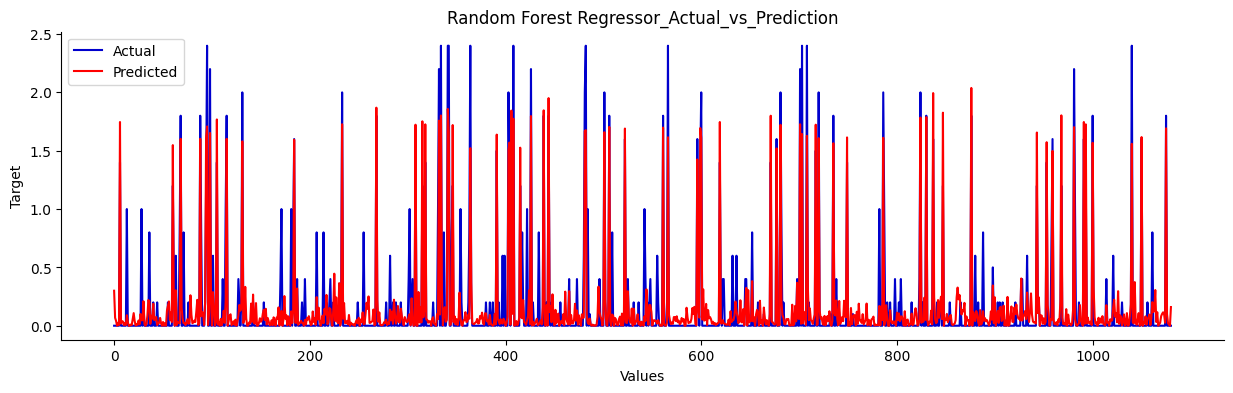

In [26]:
# Model
model = RandomForestRegressor(random_state=19)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')

# Classification Model

In [27]:
label_encoder_Location= preprocessing.LabelEncoder() 
label_encoder_RainToday= preprocessing.LabelEncoder() 
label_encoder_RainTomorrow= preprocessing.LabelEncoder() 
label_encoder_WindGustDir = preprocessing.LabelEncoder() 
label_encoder_WindDir9am= preprocessing.LabelEncoder() 
label_encoder_WindDir3pm = preprocessing.LabelEncoder() 

data_cla['Location']= label_encoder_Location.fit_transform(data_cla['Location']) 
data_cla['RainToday']= label_encoder_RainToday.fit_transform(data_cla['RainToday']) 
data_cla['RainTomorrow']= label_encoder_RainTomorrow.fit_transform(data_cla['RainTomorrow']) 
data_cla['WindGustDir']= label_encoder_WindGustDir.fit_transform(data_cla['WindGustDir']) 
data_cla['WindDir9am']= label_encoder_WindDir9am.fit_transform(data_cla['WindDir9am']) 
data_cla['WindDir3pm']= label_encoder_WindDir3pm.fit_transform(data_cla['WindDir3pm']) 

In [28]:
data_cla.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

In [29]:
data_cla=data_cla.fillna(data_cla.mean())

C:\Users\kulsr\AppData\Local\Temp\ipykernel_8896\3313828704.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_cla=data_cla.fillna(data_cla.mean())


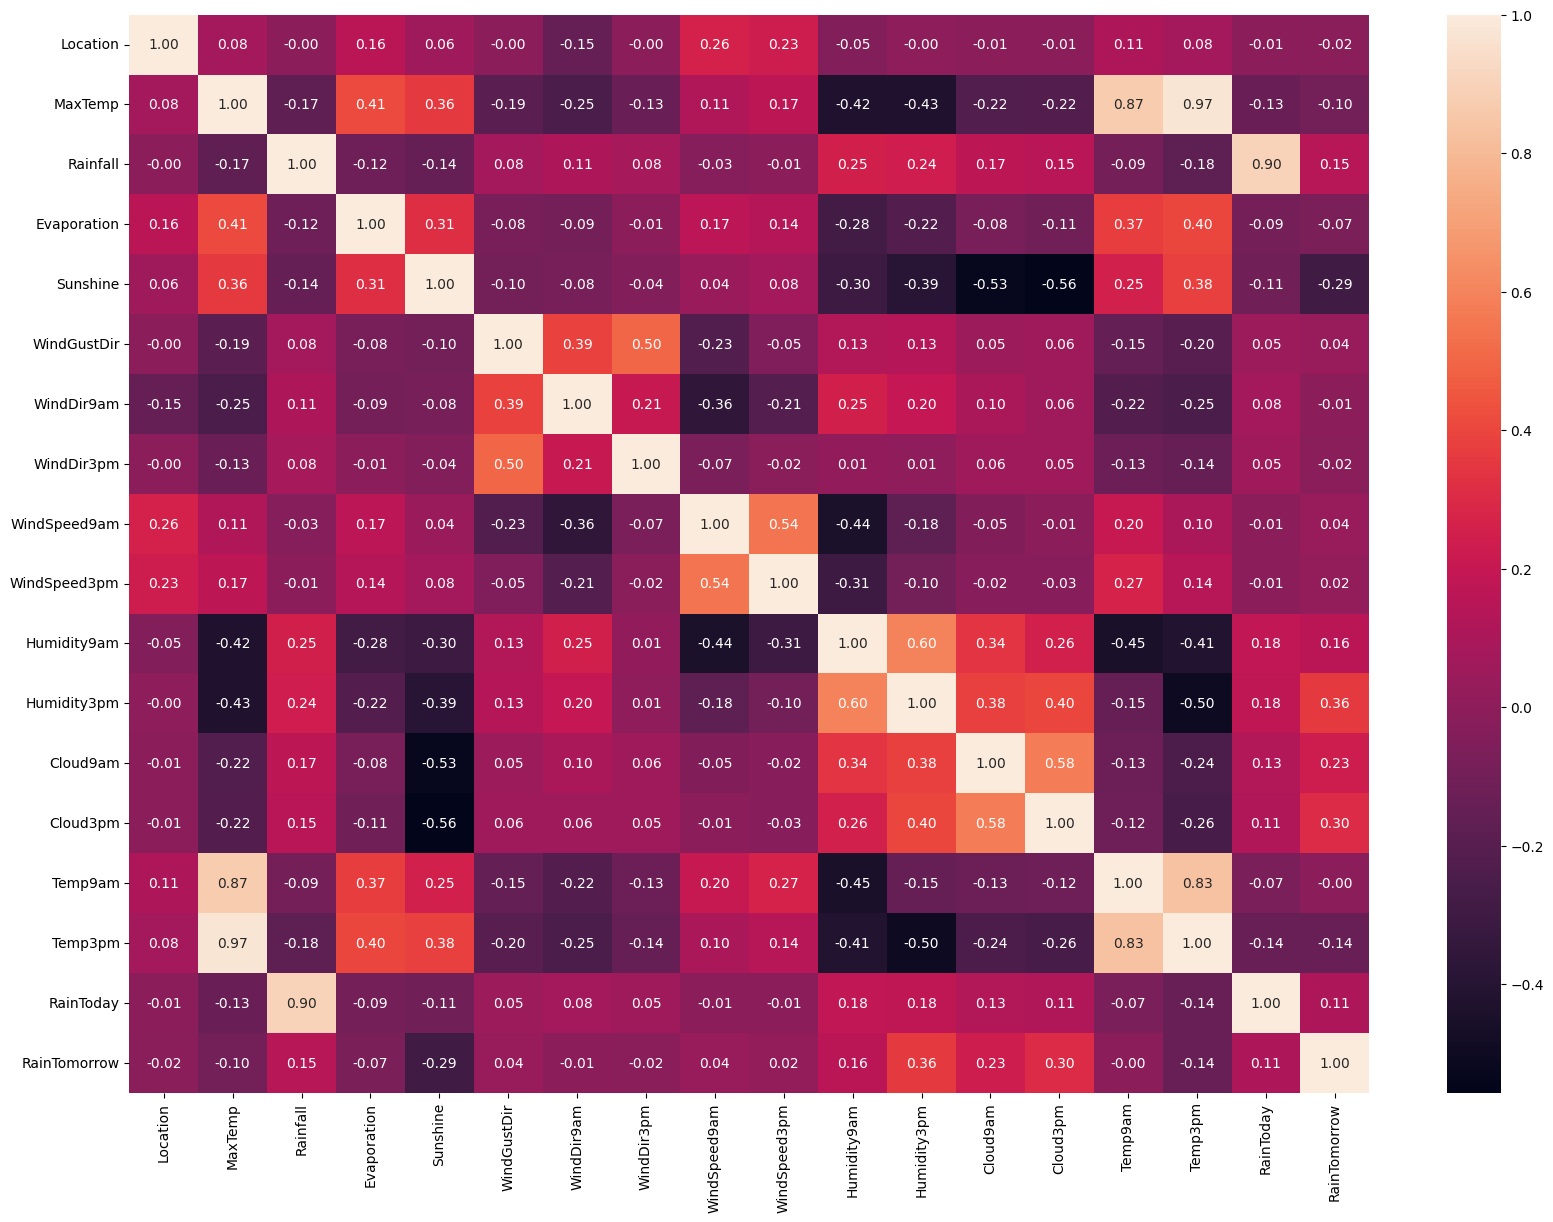

In [30]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(data=data_reg.corr(), annot=True, fmt='.2f')

In [31]:
data_cla.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [32]:
data_cla = data_cla.drop_duplicates()

In [33]:
data_cla = data_cla.drop(columns=['WindDir9am', 'WindDir3pm','Temp9am','Date'],axis=1)

In [34]:
X = data_cla.drop('RainTomorrow', axis = 1)
y = data_cla['RainTomorrow']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation_fn(best_model, X_test, Y_test):
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)


In [36]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.7450110864745011
Precision of the model is: 0.7438669694972889
Recall of the model is: 0.7450110864745011
F1 score of the model is: 0.7443578247935165


In [37]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.8248337028824834
Precision of the model is: 0.812601966765129
Recall of the model is: 0.8248337028824834
F1 score of the model is: 0.8074909463673198
